## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import classification_report, mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')

In [14]:
# All training data
df = pd.read_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\train_final.csv')
len(df)
df.head(5)

,Unnamed: 0,fullVisitorId,channelGrouping,first_ses_from_the_period_start,last_ses_from_the_period_end,interval_dates,unique_date_num,maxVisitNum,browser,operatingSystem,...,pageviews_mean,pageviews_min,pageviews_max,pageviews_median,pageviews_sd,session_cnt,transactionRevenue,transactions,target,ret
0,1,10278554503158,Organic Search,80,87,0,1,1,Chrome,Macintosh,...,8.0,8.0,8.0,8.0,NaN,1,0.0,0,0.0,0
1,2,20424342248747,Organic Search,121,46,0,1,1,Chrome,Windows,...,13.0,13.0,13.0,13.0,NaN,1,0.0,0,0.0,0
2,3,5103959234087,Organic Search,20,147,0,1,1,Chrome,Android,...,8.0,8.0,8.0,8.0,NaN,1,0.0,0,0.0,0
3,4,93957001069502,Organic Search,57,110,0,1,1,Chrome,Windows,...,2.0,2.0,2.0,2.0,NaN,1,0.0,0,0.0,0
4,5,114156543135683,Social,7,160,0,1,1,Safari,Macintosh,...,1.0,1.0,1.0,1.0,NaN,1,0.0,0,0.0,0


In [15]:
df = df.drop(columns = ['isVideoAd_mean',
                            'Unnamed: 0',
                            'isTrueDirect',
                            'hits_min',
                            'hits_max',
                            'hits_median',
                            'hits_sd',
                            'pageviews_min',
                            'pageviews_max',
                            'pageviews_median',
                            'pageviews_sd'])

In [16]:
len(set(df['networkDomain']))

42722

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417575 entries, 0 to 1417574
Data columns (total 30 columns):
fullVisitorId                      1417575 non-null object
channelGrouping                    1417575 non-null object
first_ses_from_the_period_start    1417575 non-null int64
last_ses_from_the_period_end       1417575 non-null int64
interval_dates                     1417575 non-null int64
unique_date_num                    1417575 non-null int64
maxVisitNum                        1417575 non-null int64
browser                            1417575 non-null object
operatingSystem                    1417575 non-null object
deviceCategory                     1417575 non-null object
continent                          1417575 non-null object
subContinent                       1417575 non-null object
country                            1417575 non-null object
region                             1417575 non-null object
metro                              1417575 non-null object
city   

In [18]:
df_test = pd.read_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\test_final.csv')
len(df_test)
df_test

,Unnamed: 0,fullVisitorId,channelGrouping,first_ses_from_the_period_start,last_ses_from_the_period_end,interval_dates,unique_date_num,maxVisitNum,browser,operatingSystem,...,pageviews_mean,pageviews_min,pageviews_max,pageviews_median,pageviews_sd,session_cnt,transactionRevenue,transactions,target,ret
0,1417576,18966949534117,Organic Search,104,63,0,1,1,Chrome,Macintosh,...,7.0,7.0,7.0,7.0,NaN,1,0.0,0,NaN,NaN
1,1417577,39738481224681,Direct,43,124,0,1,1,Chrome,Android,...,1.0,1.0,1.0,1.0,NaN,1,0.0,0,NaN,NaN
2,1417578,73585230191399,Organic Search,33,134,0,1,1,Safari,iOS,...,1.0,1.0,1.0,1.0,NaN,1,0.0,0,NaN,NaN
3,1417579,87588448856385,Organic Search,36,131,0,1,1,Chrome,Windows,...,1.0,1.0,1.0,1.0,NaN,1,0.0,0,NaN,NaN
4,1417580,149787903119437,Organic Search,20,147,0,1,1,Chrome,Android,...,1.0,1.0,1.0,1.0,NaN,1,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296525,1714101,9999862054614696520,Organic Search,7,160,0,1,1,Chrome,Macintosh,...,12.0,12.0,12.0,12.0,NaN,1,0.0,0,NaN,NaN
296526,1714102,9999898168621645223,Organic Search,67,100,0,1,1,Safari,iOS,...,3.0,3.0,3.0,3.0,NaN,1,0.0,0,NaN,NaN
296527,1714103,999990167740728398,Direct,93,74,0,1,1,Opera Mini,(not set),...,1.0,1.0,1.0,1.0,NaN,1,0.0,0,NaN,NaN
296528,1714104,9999915620249883537,Organic Search,46,121,0,1,1,Chrome,Windows,...,7.0,7.0,7.0,7.0,NaN,1,0.0,0,NaN,NaN


In [19]:
df_test = df_test.drop(columns = ['isVideoAd_mean',
                            'Unnamed: 0',
                            'isTrueDirect',
                            'hits_min',
                            'hits_max',
                            'hits_median',
                            'hits_sd',
                            'pageviews_min',
                            'pageviews_max',
                            'pageviews_median',
                            'pageviews_sd'])

In [20]:
# use label encoding to convert categorical data to numeric one
c = ['city','browser','channelGrouping',"operatingSystem","continent",'subContinent','country',
                             'region','metro','networkDomain','source','medium','deviceCategory']
le = preprocessing.LabelEncoder()
for col in c:
    df[col] = le.fit_transform(df[col].values)
    df_test[col] = le.fit_transform(df_test[col].values)

In [21]:
x_train_return = df.drop(['fullVisitorId','target','ret'], axis = 1)
y_train_return = df['ret']

x_train_target = df[df['ret'] == 1].drop(['fullVisitorId','target','ret'], axis = 1)
y_train_target = df[df['ret'] == 1]['target']

x_test = df_test.drop(['fullVisitorId','target','ret'], axis = 1)

In [22]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296530 entries, 0 to 296529
Data columns (total 27 columns):
channelGrouping                    296530 non-null int32
first_ses_from_the_period_start    296530 non-null int64
last_ses_from_the_period_end       296530 non-null int64
interval_dates                     296530 non-null int64
unique_date_num                    296530 non-null int64
maxVisitNum                        296530 non-null int64
browser                            296530 non-null int32
operatingSystem                    296530 non-null int32
deviceCategory                     296530 non-null int32
continent                          296530 non-null int32
subContinent                       296530 non-null int32
country                            296530 non-null int32
region                             296530 non-null int32
metro                              296530 non-null int32
city                               296530 non-null int32
networkDomain                     

In [23]:
# Split train and validation data

# for target variable = return
x_train_return, x_valid_return, y_train_return, y_valid_return = train_test_split(x_train_return, y_train_return, test_size=0.33)

# for target variable = target
x_train_target, x_valid_target, y_train_target, y_valid_target = train_test_split(x_train_target, y_train_target, test_size=0.33)

In [676]:
# Normalized training dataset

# Normalize train_target
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_target)
x_train_target_scaled = scaler.transform(x_train_target)
x_valid_target_scaled = scaler.transform(x_valid_target)

# Normalize train_return 
scaler = MinMaxScaler()
scaler.fit(x_train_return)
x_train_return_scaled = scaler.transform(x_train_return)
x_valid_return_scaled = scaler.transform(x_valid_return)

# Normalize test dataset
scaler = MinMaxScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [677]:
# Deal with nan values
np.argwhere(np.isnan(x_train_return_scaled))
x_train_return_scaled = np.nan_to_num(x_train_return_scaled)

np.argwhere(np.isnan(x_valid_return_scaled))
x_valid_return_scaled = np.nan_to_num(x_valid_return_scaled)

np.argwhere(np.isnan(x_test_scaled))
x_test_scaled = np.nan_to_num(x_test_scaled)

## Model 1 : Random Forest

### Using original features to see the model performance

In [678]:
# Download necessary library for random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [680]:
# Build random forest classification model
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
clf.fit(x_train_return_scaled, y_train_return)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [679]:
# Build random forest regression model
reg = RandomForestRegressor(max_depth=10, n_estimators=100)
reg.fit(x_train_target_scaled, y_train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [682]:
# Classification Report
y_pred_valid_return = clf.predict(x_valid_return_scaled)
print(classification_report(y_valid_return, y_pred_valid_return))
# Calculating R-square
print("Its R-square of random forest regression model is", reg.score(x_train_target_scaled, y_train_target))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    464923
           1       0.00      0.00      0.00      2877

    accuracy                           0.99    467800
   macro avg       0.50      0.50      0.50    467800
weighted avg       0.99      0.99      0.99    467800

Its R-square of random forest regression model is 0.4786546091953813


In [683]:
# Calculating RMSE before tuning hyperparameters
y_pred_target = reg.predict(x_valid_target_scaled)
print("The RMSE of random forest regression model is",np.sqrt(mean_squared_error(y_valid_target, y_pred_target)))

Its RMSE of random forest regression model is 4.00323956489714


### Utilizing randomizedsearchCV to tune hyperparameters

In [684]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [685]:
# Use RandomizedSearchCV for best hyperparameters

# First create the base model to tune
reg2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
reg2_random = RandomizedSearchCV(estimator = reg2, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
reg2_random.fit(x_train_target_scaled, y_train_target)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [686]:
reg2_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [687]:
best_random = RandomForestRegressor(n_estimators=200,
                                 min_samples_split=5,
                                 min_samples_leaf=2,
                                 max_features='sqrt',
                                 max_depth=10,
                                 bootstrap=True)

best_random.fit(x_train_target_scaled, y_train_target)
y_predF = best_random.predict(x_valid_target_scaled)
print("Its RMSE of tuned random forest model is",np.sqrt(mean_squared_error(y_valid_target, y_predF)))

Its RMSE of tuned random forest model is 3.901847198007343


In [688]:
y_pred_target =  best_random.predict(x_test_scaled)
y_pred_target

array([0.28238238, 0.3591359 , 0.02736908, ..., 0.25784802, 0.36411663,
       0.37251495])

In [689]:
df_test1 = pd.read_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\test.csv',converters={'fullVisitorId': lambda x: str(x)})

In [691]:
#test
data = {'fullVisitorId': [i for i in df_test1.fullVisitorId], 'PredictedLogRevenue': [j for j in y_pred_target]}
submission_random_forest = pd.DataFrame(data)
submission_random_forest

,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.282382
1,0000039738481224681,0.359136
2,0000073585230191399,0.027369
3,0000087588448856385,0.037537
4,0000149787903119437,0.004584
...,...,...
296525,9999862054614696520,0.964398
296526,9999898168621645223,0.036835
296527,999990167740728398,0.257848
296528,9999915620249883537,0.364117


In [692]:
import csv
submission_random_forest.to_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\submission_random_forest.csv', index = False)

### Utilizing feature selection and executing random forest model with tuned hyperparameters

In [693]:
#Feature Selection for classification
feature_importances_clf = pd.DataFrame(clf.feature_importances_,
                                   index = x_train_target.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [694]:
feature_importances_clf

,importance
interval_dates,0.285881
maxVisitNum,0.186963
unique_date_num,0.154433
last_ses_from_the_period_end,0.144428
session_cnt,0.072903
pageviews_sum,0.041733
hits_sum,0.025367
first_ses_from_the_period_start,0.025121
bounce_sessions,0.015758
pageviews_mean,0.008133


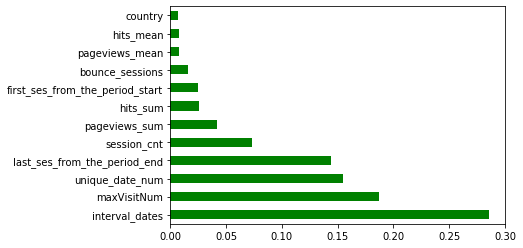

In [695]:
#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt
feature_importances_clf2 = pd.Series(clf.feature_importances_, index=x_train_target.columns)
feature_importances_clf2.nlargest(12).plot(kind='barh',color='g')
plt.show()

In [697]:
feature_importances_clf[feature_importances_clf['importance']>= 0.05].index.tolist()

['interval_dates',
 'maxVisitNum',
 'unique_date_num',
 'last_ses_from_the_period_end',
 'session_cnt']

In [698]:
#Feature Selection for classification
feature_importances_reg = pd.DataFrame(best_random.feature_importances_,
                                   index = x_train_target.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [699]:
feature_importances_reg

,importance
transactionRevenue,0.127108
first_ses_from_the_period_start,0.077094
hits_mean,0.073249
transactions,0.071604
hits_sum,0.070696
pageviews_mean,0.064597
last_ses_from_the_period_end,0.063047
pageviews_sum,0.062329
interval_dates,0.049413
networkDomain,0.037815


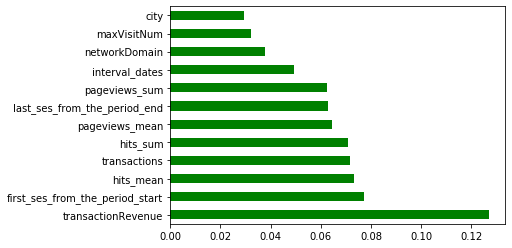

In [700]:
#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt
feature_importances_reg2 = pd.Series(best_random.feature_importances_, index=x_train_target.columns)
feature_importances_reg2.nlargest(12).plot(kind='barh',color='g')
plt.show()

In [701]:
feature_importances_reg[feature_importances_reg['importance']>= 0.05].index.tolist()

['transactionRevenue',
 'first_ses_from_the_period_start',
 'hits_mean',
 'transactions',
 'hits_sum',
 'pageviews_mean',
 'last_ses_from_the_period_end',
 'pageviews_sum']

In [713]:
# Split train and validation data

# for target variable = return
x_train_return, x_valid_return, y_train_return, y_valid_return = train_test_split(x_train_return, y_train_return, test_size=0.33)

# for target variable = target
x_train_target, x_valid_target, y_train_target, y_valid_target = train_test_split(x_train_target, y_train_target, test_size=0.33)

In [714]:
# Select important features
x_train_return = x_train_return[['interval_dates',
                                 'maxVisitNum',
                                 'unique_date_num',
                                 'last_ses_from_the_period_end',
                                 'session_cnt']]
x_valid_return = x_valid_return[['interval_dates',
                                 'maxVisitNum',
                                 'unique_date_num',
                                 'last_ses_from_the_period_end',
                                 'session_cnt']]
x_train_target = x_train_target[['transactionRevenue',
                                 'first_ses_from_the_period_start',
                                 'hits_mean',
                                 'transactions',
                                 'hits_sum',
                                 'pageviews_mean',
                                 'last_ses_from_the_period_end',
                                 'pageviews_sum']]
x_valid_target = x_valid_target[['transactionRevenue',
                                 'first_ses_from_the_period_start',
                                 'hits_mean',
                                 'transactions',
                                 'hits_sum',
                                 'pageviews_mean',
                                 'last_ses_from_the_period_end',
                                 'pageviews_sum']]
x_test_return = x_test[['interval_dates',
                                 'maxVisitNum',
                                 'unique_date_num',
                                 'last_ses_from_the_period_end',
                                 'session_cnt']]

x_test_target = x_test[['transactionRevenue',
                                 'first_ses_from_the_period_start',
                                 'hits_mean',
                                 'transactions',
                                 'hits_sum',
                                 'pageviews_mean',
                                 'last_ses_from_the_period_end',
                                 'pageviews_sum']]

In [716]:
# Normalized training & testing dataset

# Normalize train_target
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_target)
x_train_target_scaled = scaler.transform(x_train_target)
x_valid_target_scaled = scaler.transform(x_valid_target)

# Normalize train_return
scaler = MinMaxScaler()
scaler.fit(x_train_return)
x_train_return_scaled = scaler.transform(x_train_return)
x_valid_return_scaled = scaler.transform(x_valid_return)

# Normalize test
scaler = MinMaxScaler()
scaler.fit(x_test_return)
x_test_return_scaled = scaler.transform(x_test_return)

scaler.fit(x_test_target)
x_test_target_scaled = scaler.transform(x_test_target)

In [717]:
# Dealing with NAN value
np.argwhere(np.isnan(x_train_return_scaled))
x_train_return_scaled = np.nan_to_num(x_train_return_scaled)

np.argwhere(np.isnan(x_valid_return_scaled))
x_valid_return_scaled = np.nan_to_num(x_valid_return_scaled)

np.argwhere(np.isnan(x_test_scaled))
x_test_return_scaled = np.nan_to_num(x_test_return_scaled)
x_test_target_scaled = np.nan_to_num(x_test_target_scaled)


In [718]:
# Build random forest model
# For classification model (target variable = return)
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
clf.fit(x_train_return_scaled, y_train_return)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [719]:
y_pred_valid_return = clf.predict(x_valid_return_scaled)
# Classification Report
print(classification_report(y_valid_return, y_pred_valid_return))

# For regression model (target variable = target)
reg = RandomForestRegressor(max_depth=10, n_estimators=100)
reg.fit(x_train_target_scaled, y_train_target)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     93699
           1       0.60      0.01      0.02       568

    accuracy                           0.99     94267
   macro avg       0.80      0.51      0.51     94267
weighted avg       0.99      0.99      0.99     94267



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [720]:
# Calculating R-square
print("Its R-square of random forest regression model is", reg.score(x_train_target_scaled, y_train_target))

Its R-square of random forest regression model is 0.722565384969677


In [721]:
best_random.fit(x_train_target_scaled, y_train_target)
y_predF_new = best_random.predict(x_valid_target_scaled)
print("Its RMSE of tuned random forest model is",np.sqrt(mean_squared_error(y_valid_target, y_predF_new)))

Its RMSE of tuned random forest model is 3.474077726323697


In [722]:
y_pred_target_new = best_random.predict(x_test_target_scaled)
y_pred_target_new

array([0.16788353, 0.16438741, 0.16438741, ..., 0.36746037, 0.25762755,
       0.53529752])

In [723]:
df_test1 = pd.read_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\test.csv',converters={'fullVisitorId': lambda x: str(x)})

In [724]:
#test
data_random_forest = {'fullVisitorId': [i for i in df_test1.fullVisitorId], 'PredictedLogRevenue': [j for j in y_pred_target_new]}
submission_random_forest_new = pd.DataFrame(data)
submission_random_forest_new 

,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.282382
1,0000039738481224681,0.359136
2,0000073585230191399,0.027369
3,0000087588448856385,0.037537
4,0000149787903119437,0.004584
...,...,...
296525,9999862054614696520,0.964398
296526,9999898168621645223,0.036835
296527,999990167740728398,0.257848
296528,9999915620249883537,0.364117


In [725]:
submission_random_forest_new.to_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\submission_random_forest2.csv', index = False)

## Model 2 : XGboost

In [726]:
# Import necessary libraries
from sklearn import ensemble
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [727]:
x_train_return = df.drop(['fullVisitorId','target','ret'], axis = 1)
y_train_return = df['ret']

x_train_target = df[df['ret'] == 1].drop(['fullVisitorId','target','ret'], axis = 1)
y_train_target = df[df['ret'] == 1]['target']

x_test = df_test.drop(['fullVisitorId','target','ret'], axis = 1)

In [728]:
# Split train and validation data

# for target variable = return
x_train_return, x_valid_return, y_train_return, y_valid_return = train_test_split(x_train_return, y_train_return, test_size=0.33)

# for target variable = target
x_train_target, x_valid_target, y_train_target, y_valid_target = train_test_split(x_train_target, y_train_target, test_size=0.33)

In [729]:
# Normalized training & testing dataset

# Normalize train_target
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_target)
x_train_target_scaled = scaler.transform(x_train_target)
x_valid_target_scaled = scaler.transform(x_valid_target)

# Normalize train_return
scaler = MinMaxScaler()
scaler.fit(x_train_return)
x_train_return_scaled = scaler.transform(x_train_return)
x_valid_return_scaled = scaler.transform(x_valid_return)

# Normalize test
scaler = MinMaxScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [730]:
# Dealing with NAN value
np.argwhere(np.isnan(x_train_return_scaled))
x_train_return_scaled = np.nan_to_num(x_train_return_scaled)

np.argwhere(np.isnan(x_valid_return_scaled))
x_valid_return_scaled = np.nan_to_num(x_valid_return_scaled)

np.argwhere(np.isnan(x_test_scaled))
x_test_scaled = np.nan_to_num(x_test_scaled)

In [731]:
# XGboost classification
clf = xgb.XGBClassifier(max_depth=10,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=500,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)
clf.fit(x_train_return_scaled, y_train_return, eval_metric='auc', verbose=True,
            eval_set=[(x_valid_return_scaled, y_valid_return)], early_stopping_rounds=5)

y_pred_valid_return = clf.predict(x_valid_return_scaled)

[0]	validation_0-auc:0.840764
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.867023
[2]	validation_0-auc:0.876627
[3]	validation_0-auc:0.877874
[4]	validation_0-auc:0.877972
[5]	validation_0-auc:0.879299
[6]	validation_0-auc:0.879304
[7]	validation_0-auc:0.880145
[8]	validation_0-auc:0.881351
[9]	validation_0-auc:0.883728
[10]	validation_0-auc:0.884225
[11]	validation_0-auc:0.884786
[12]	validation_0-auc:0.884822
[13]	validation_0-auc:0.884727
[14]	validation_0-auc:0.884264
[15]	validation_0-auc:0.884703
[16]	validation_0-auc:0.884399
[17]	validation_0-auc:0.884525
Stopping. Best iteration:
[12]	validation_0-auc:0.884822



In [732]:
# CLassification Report
print(classification_report(y_valid_return, y_pred_valid_return))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    464957
           1       0.43      0.02      0.04      2843

    accuracy                           0.99    467800
   macro avg       0.71      0.51      0.52    467800
weighted avg       0.99      0.99      0.99    467800



In [754]:
# XGboost Regression
xg_reg = xgb.XGBRegressor(learning_rate=0.1,max_depth=10)

In [755]:
# fit the model with the training data
xg_reg.fit(x_train_target_scaled, y_train_target)

[21:20:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [756]:
# Calculating R-square
print("Its R-square of XGboost regression model is", xg_reg.score(x_train_target_scaled, y_train_target))

# Calculating RMSE for regression
y_pred_valid_target = xg_reg.predict(x_valid_target_scaled)
print("Its RMSE of XGboost regression model is",np.sqrt(mean_squared_error(y_pred_valid_target, y_valid_target)))

Its R-square of XGboost regression model is 0.9468226969141958
Its RMSE of XGboost regression model is 4.407437111752069


In [757]:
y_pred = xg_reg.predict(x_test_scaled)

In [758]:
y_pred

array([ 0.4664757 ,  4.687464  ,  0.06096366, ...,  0.00505006,
        0.02956718, -0.2237975 ], dtype=float32)

In [759]:
df_test1 = pd.read_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\test.csv',converters={'fullVisitorId': lambda x: str(x)})

In [760]:
data_xgboost = {'fullVisitorId': [i for i in df_test1.fullVisitorId], 'PredictedLogRevenue': [j for j in y_pred]}
submission_xgboost = pd.DataFrame(data_xgboost)
submission_xgboost

,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.466476
1,0000039738481224681,4.687464
2,0000073585230191399,0.060964
3,0000087588448856385,-0.021676
4,0000149787903119437,0.437586
...,...,...
296525,9999862054614696520,1.720398
296526,9999898168621645223,-0.039090
296527,999990167740728398,0.005050
296528,9999915620249883537,0.029567


In [761]:
submission_xgboost.to_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\submission_xgboost.csv', index = False)

In [762]:
submission_xgboost

,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.466476
1,0000039738481224681,4.687464
2,0000073585230191399,0.060964
3,0000087588448856385,-0.021676
4,0000149787903119437,0.437586
...,...,...
296525,9999862054614696520,1.720398
296526,9999898168621645223,-0.039090
296527,999990167740728398,0.005050
296528,9999915620249883537,0.029567


### Utilizing feature selection and executing XGboost model again

In [746]:
#Feature Selection for classification
feature_importances_xg_clf = pd.DataFrame(clf.feature_importances_,
                                   index = x_train_target.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [747]:
feature_importances_xg_clf

,importance
maxVisitNum,0.188062
last_ses_from_the_period_end,0.110923
interval_dates,0.094427
session_cnt,0.044560
unique_date_num,0.039723
metro,0.031840
isMobile,0.031498
channelGrouping,0.030286
medium,0.029387
bounce_sessions,0.029100


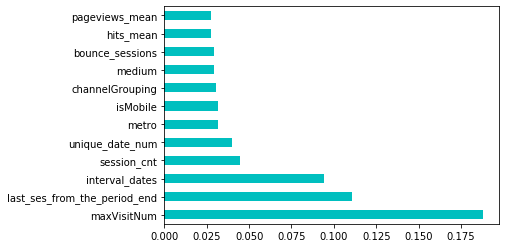

In [748]:
#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt
feature_importances_xg_clf2 = pd.Series(clf.feature_importances_, index=x_train_target.columns)
feature_importances_xg_clf2.nlargest(12).plot(kind='barh',color='c')
plt.show()

In [749]:
# classification
feature_importances_xg_clf[feature_importances_xg_clf['importance']>= 0.035].index.tolist()

['maxVisitNum',
 'last_ses_from_the_period_end',
 'interval_dates',
 'session_cnt',
 'unique_date_num']

In [767]:
#Feature Selection for regression
feature_importances_xg_reg = pd.DataFrame(xg_reg.feature_importances_,
                                   index = x_train_target.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [764]:
feature_importances_xg_reg

,importance
transactionRevenue,0.253437
isMobile,0.085102
transactions,0.042302
operatingSystem,0.037384
hits_mean,0.037252
pageviews_mean,0.037240
pageviews_sum,0.036746
interval_dates,0.036145
hits_sum,0.035135
city,0.034437


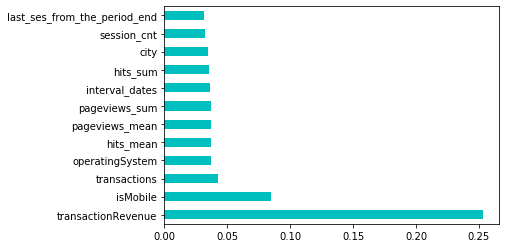

In [765]:
#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt
feature_importances_xg_reg = pd.Series(xg_reg.feature_importances_, index=x_train_target.columns)
feature_importances_xg_reg.nlargest(12).plot(kind='barh',color='c')
plt.show()

In [768]:
# regression
feature_importances_xg_reg[feature_importances_xg_reg['importance']>= 0.035].index.tolist()

['transactionRevenue',
 'isMobile',
 'transactions',
 'operatingSystem',
 'hits_mean',
 'pageviews_mean',
 'pageviews_sum',
 'interval_dates',
 'hits_sum']

In [769]:
# Split train and validation data
# for target variable = return
x_train_return, x_valid_return, y_train_return, y_valid_return = train_test_split(x_train_return, y_train_return, test_size=0.33)

# for target variable = target
x_train_target, x_valid_target, y_train_target, y_valid_target = train_test_split(x_train_target, y_train_target, test_size=0.33)

In [770]:
# Select important features for classification
x_train_return = x_train_return[['maxVisitNum',
                                 'last_ses_from_the_period_end',
                                 'interval_dates',
                                 'session_cnt',
                                 'unique_date_num']]
x_valid_return = x_valid_return[['maxVisitNum',
                                 'last_ses_from_the_period_end',
                                 'interval_dates',
                                 'session_cnt',
                                 'unique_date_num']]
x_test_return = x_test[['maxVisitNum',
                                 'last_ses_from_the_period_end',
                                 'interval_dates',
                                 'session_cnt',
                                 'unique_date_num']]
# Select important features for regression
x_train_target = x_train_target[['transactionRevenue',
                                 'isMobile',
                                 'transactions',
                                 'operatingSystem',
                                 'hits_mean',
                                 'pageviews_mean',
                                 'pageviews_sum',
                                 'interval_dates',
                                 'hits_sum']]
x_valid_target = x_valid_target[['transactionRevenue',
                                 'isMobile',
                                 'transactions',
                                 'operatingSystem',
                                 'hits_mean',
                                 'pageviews_mean',
                                 'pageviews_sum',
                                 'interval_dates',
                                 'hits_sum']]

x_test_target = x_test[['transactionRevenue',
                                 'isMobile',
                                 'transactions',
                                 'operatingSystem',
                                 'hits_mean',
                                 'pageviews_mean',
                                 'pageviews_sum',
                                 'interval_dates',
                                 'hits_sum']]

In [771]:
# Normalized training & testing dataset

# Normalize train_target
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_target)
x_train_target_scaled = scaler.transform(x_train_target)
x_valid_target_scaled = scaler.transform(x_valid_target)

# Normalize train_return
scaler = MinMaxScaler()
scaler.fit(x_train_return)
x_train_return_scaled = scaler.transform(x_train_return)
x_valid_return_scaled = scaler.transform(x_valid_return)

# Normalize test
scaler = MinMaxScaler()
scaler.fit(x_test_target)
x_test_target_scaled = scaler.transform(x_test_target)
scaler.fit(x_test_return)
x_test_return_scaled = scaler.transform(x_test_return)

In [772]:
# Dealing with NAN value
np.argwhere(np.isnan(x_train_return_scaled))
x_train_return_scaled = np.nan_to_num(x_train_return_scaled)

np.argwhere(np.isnan(x_valid_return_scaled))
x_valid_return_scaled = np.nan_to_num(x_valid_return_scaled)

np.argwhere(np.isnan(x_test_scaled))
x_test_return_scaled = np.nan_to_num(x_test_return_scaled)
x_test_target_scaled = np.nan_to_num(x_test_target_scaled)

In [773]:
# XGboost classification
clf = xgb.XGBClassifier(max_depth=10,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=500,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)
clf.fit(x_train_return_scaled, y_train_return, eval_metric='auc', verbose=True,
            eval_set=[(x_valid_return_scaled, y_valid_return)], early_stopping_rounds=5)

y_pred_valid_return = clf.predict(x_valid_return_scaled)

[0]	validation_0-auc:0.790371
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.811361
[2]	validation_0-auc:0.820967
[3]	validation_0-auc:0.823629
[4]	validation_0-auc:0.823931
[5]	validation_0-auc:0.824745
[6]	validation_0-auc:0.825439
[7]	validation_0-auc:0.82547
[8]	validation_0-auc:0.826124
[9]	validation_0-auc:0.827535
[10]	validation_0-auc:0.829742
[11]	validation_0-auc:0.830777
[12]	validation_0-auc:0.831048
[13]	validation_0-auc:0.830361
[14]	validation_0-auc:0.831438
[15]	validation_0-auc:0.831822
[16]	validation_0-auc:0.832153
[17]	validation_0-auc:0.832076
[18]	validation_0-auc:0.832266
[19]	validation_0-auc:0.831917
[20]	validation_0-auc:0.83158
[21]	validation_0-auc:0.831914
[22]	validation_0-auc:0.831441
[23]	validation_0-auc:0.831114
Stopping. Best iteration:
[18]	validation_0-auc:0.832266



In [774]:
# CLassification Report
print(classification_report(y_valid_return, y_pred_valid_return))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    311474
           1       0.36      0.02      0.04      1952

    accuracy                           0.99    313426
   macro avg       0.68      0.51      0.52    313426
weighted avg       0.99      0.99      0.99    313426



In [775]:
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef,classification_report,roc_curve, auc, mean_squared_error, make_scorer, f1_score
from math import sqrt
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, RandomizedSearchCV

xgb_estimator = xgb.XGBRegressor()

param_grid = {'max_depth': range(15), 
              'n_estimators ':[50,100,150],
              'learning_rate': [0.01, 0.1,0.5,1]}
xgb_new = RandomizedSearchCV(xgb_estimator, param_distributions = param_grid, cv=3, verbose = 2)
xgb_new.fit(x_train_target_scaled, y_train_target)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators =50, max_depth=8, learning_rate=0.1 ................
[21:26:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators =50, max_depth=8, learning_rate=0.1, total=   0.9s
[CV] n_estimators =50, max_depth=8, learning_rate=0.1 ................
[21:26:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] . n_estimators =50, max_depth=8, learning_rate=0.1, total=   0.4s
[CV] n_estimators =50, max_depth=8, learning_rate=0.1 ................
[21:26:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] . n_estimators =50, max_depth=8, learning_rate=0.1, total=   0.3s
[CV] n_estimators =100, max_depth=12, learning_rate=0.1 ..............
[21:26:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators =100, max_depth=12, learning_rate=0.1, total=   0.5s
[CV] n_estimators =100, max_depth=12, learning_rate=0.1 ..............
[21:26:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators =100, max_depth=12, learning_rate=0.1, total=   0.6s
[CV] n_es

[CV]  n_estimators =150, max_depth=2, learning_rate=0.01, total=   0.1s
[CV] n_estimators =150, max_depth=2, learning_rate=0.01 ..............
[21:26:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators =150, max_depth=2, learning_rate=0.01, total=   0.1s
[21:26:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                  

In [776]:
xgb_best = xgb_new.best_params_
print('Best parameters found by grid search are:', xgb_best)

Best parameters found by grid search are: {'n_estimators ': 150, 'max_depth': 2, 'learning_rate': 0.01}


In [777]:
xgb_best = xgb.XGBRegressor(n_estimators = 150, max_depth = 2, learning_rate = 0.01)
xgb_best.fit(x_train_target_scaled, y_train_target)
# Calculating R-square
print("Its R-square of XGboost model is", xgb_best.score(x_train_target_scaled, y_train_target))

# Calculating RMSE for regression
y_pred_valid_target = xgb_best.predict(x_valid_target_scaled)
print("Its RMSE of XGboost model is",np.sqrt(mean_squared_error(y_pred_valid_target, y_valid_target)))

[21:27:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Its R-square of XGboost model is 0.12087742759953268
Its RMSE of XGboost model is 4.134724483858594


In [778]:
y_pred_new = xgb_best.predict(x_test_target_scaled)

In [779]:
y_pred_new

array([0.68039453, 0.49469256, 0.38342154, ..., 0.49469256, 0.5691235 ,
       0.54492813], dtype=float32)

In [780]:
df_test1 = pd.read_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\test.csv',converters={'fullVisitorId': lambda x: str(x)})

In [781]:
#test
data_xgboost_new = {'fullVisitorId': [i for i in df_test1.fullVisitorId], 'PredictedLogRevenue': [j for j in y_pred_new]}
submission_xgboost_new = pd.DataFrame(data_xgboost_new)
submission_xgboost_new

,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.680395
1,0000039738481224681,0.494693
2,0000073585230191399,0.383422
3,0000087588448856385,0.544928
4,0000149787903119437,0.494693
...,...,...
296525,9999862054614696520,0.680395
296526,9999898168621645223,0.407617
296527,999990167740728398,0.494693
296528,9999915620249883537,0.569124


In [ ]:
submission_xgboost_new.to_csv(r'C:\Users\ACER\Desktop\UMN\Predictive Analysis\FinalProject\data\submission_xgboost2.csv', index = False)